In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [52]:
df=pd.read_csv('german.csv')
df.tail()


,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,...,4,2,31,3,2,1,3,1,1,1


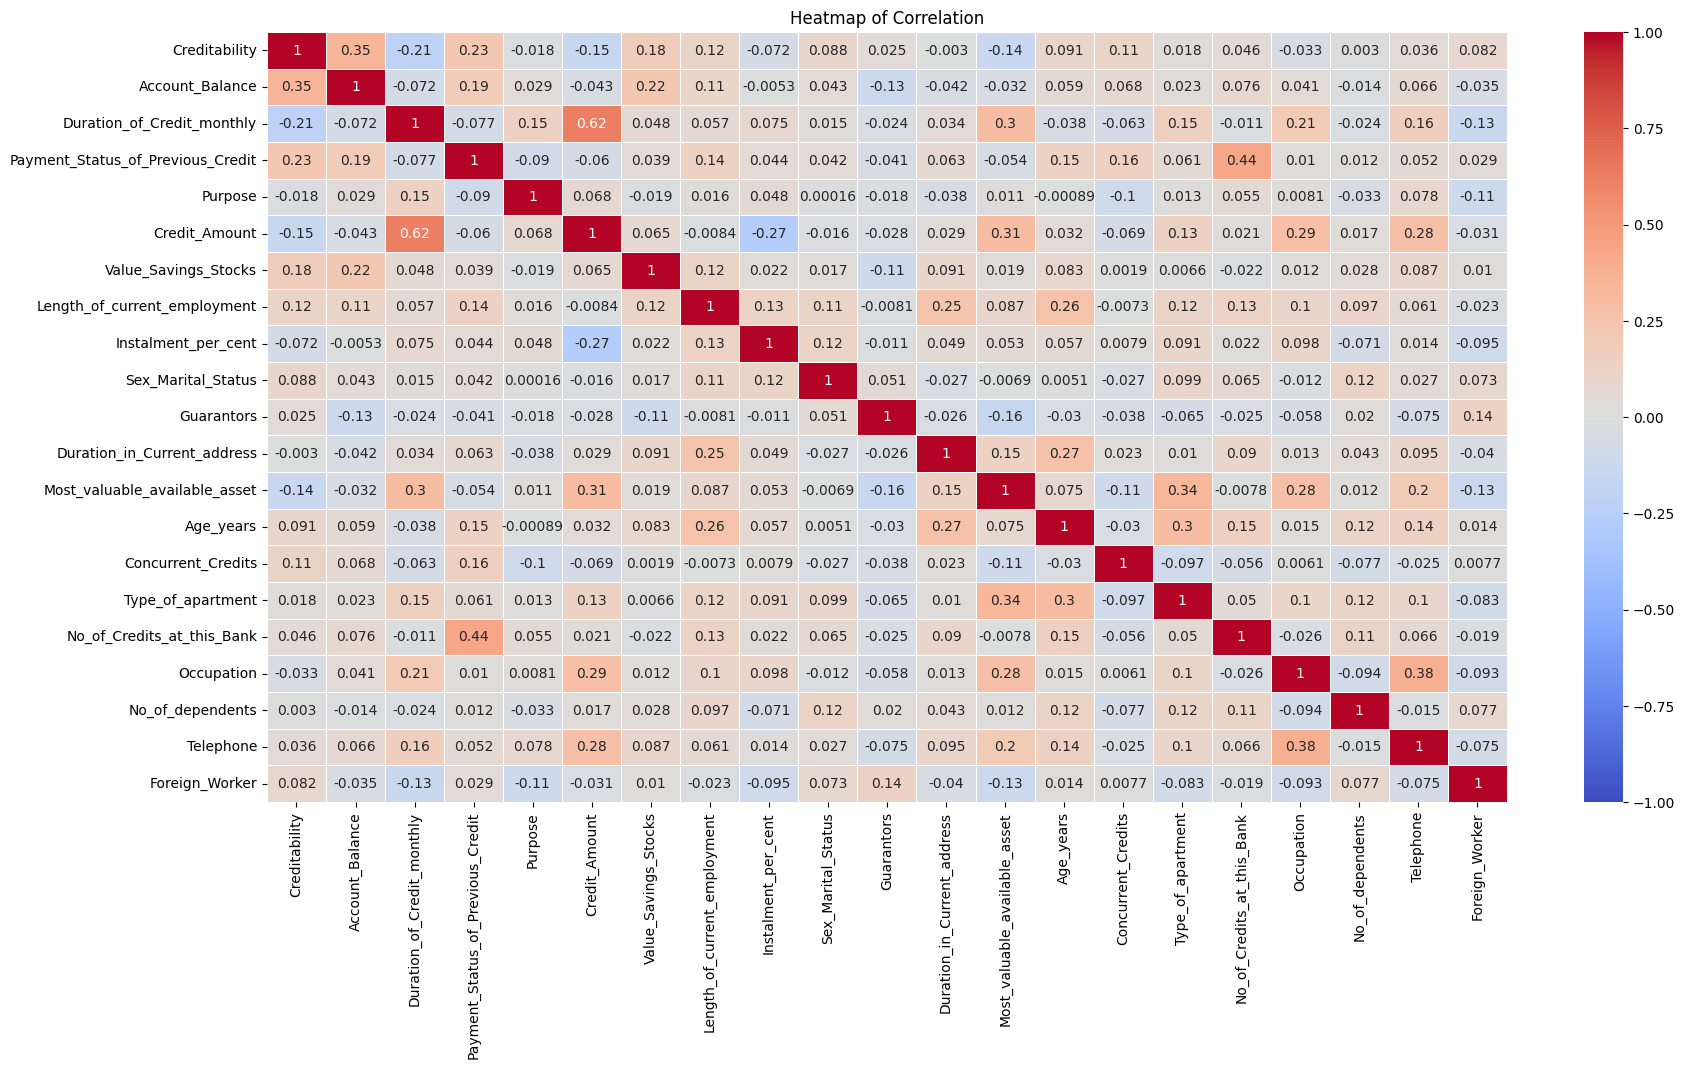

In [53]:
correlation_matrix=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,vmax=1,vmin=-1)
plt.title('Heatmap of Correlation')
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [55]:
df['Creditability'].replace(
    {1:'Qualified',
    0:'Unqualified'}
    ,inplace=True)

df['Account_Balance'].replace(
    {1:'No_Current_Account_Found',
     2:'Less_than_200_DM',
     3:'From_200_To_999_DM',
     4:'More_than_1000_DM'},
    inplace=True)

df['Purpose'].replace(
    {0:'unknown',
     1:'New_car',
     2:'Used_car',
     3:'Furniture',
     4:'Home_appliances',
     5:'Tv_or_Radio',
     6:'Tuition_fees',
     8:'Vacation',
     9:'personal_reason',
     10:'Ather'},
    inplace=True)

df['Value_Savings_Stocks'].replace(
    {1:'less_than_100_DM',
     2:'From_100_To_499_DM',
     3:'Form_500_To_999_DM',
     4:'More_than_1000_DM',
     5:'Unknown'},
    inplace=True)

df['Length_of_current_employment'].replace(
    {1:'Less_than_year',
     2:'From_1year_to_4years',
     3:'From_4years_to_7years',
     4:'More_than_7years',
     5:'Unemployed'},
    inplace=True)
df['Sex_Marital_Status'].replace(
    {1:'Single_male',
     2:'Married_female',
     3:'Married_male',
     4:'Divorced'},
    inplace=True)

df['Most_valuable_available_asset'].replace(
    {1:'car',
     2:'Property_Ownership',
     3:'Life_insurance',
     4:'Nothing'},
    inplace=True)

df['Concurrent_Credits'].replace(
    {1:'Nothing',
     2:'Store',
     3:'Another_bank'},
    inplace=True)
df['Type_of_apartment'].replace(
    {1:'Rent',
     2:'Joint_ownership',
     3:'Private_ownership'},
    inplace=True)

df['Occupation'].replace(
    {1:'Unemployed',
     2:'simple_employee',
     3:'Good employee',
     4:'Highly paid worker'},
    inplace=True)

df['Telephone'].replace(
    {1:'Yes',
     2:'NO'},
    inplace=True)

df['Foreign_Worker'].replace(
    {1:'Yes',
     2:'No'},
    inplace=True)

df['Instalment_per_cent'].replace(
    {1: '20% of income',
     2: '25% of income',
     3: '30% of income',
     4: '35% of income'},
    inplace=True)

df['Guarantors'].replace(
    {1: 'None',
     2: 'Partner',
     3: 'Other Guarantor'}, 
    inplace=True)

df['Most_valuable_available_asset'].replace(
    {1: 'Car',
     2: 'Property',
     3: 'Life Insurance',
     4: 'No valuable asset'},
    inplace=True)

df['Payment_Status_of_Previous_Credit'].replace({
    0: 'No Credit',
    1: 'Paid on Time',
    2: 'Paid in Full',
    3: 'Slight Delay',
    4: 'Critical / Default'},
    inplace=True)


In [56]:
df['Payment_Status_of_Previous_Credit'].value_counts()

Payment_Status_of_Previous_Credit
Paid in Full          530
Critical / Default    293
Slight Delay           88
Paid on Time           49
No Credit              40
Name: count, dtype: int64

In [57]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [58]:
object_col=df.select_dtypes('object').columns
df[object_col]=df[object_col].astype('category')
categorical_col=df.select_dtypes('category').columns
categorical_col

Index(['Creditability', 'Account_Balance', 'Payment_Status_of_Previous_Credit',
       'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Most_valuable_available_asset', 'Concurrent_Credits',
       'Type_of_apartment', 'Occupation', 'Telephone', 'Foreign_Worker'],
      dtype='object')

In [59]:
df['No_of_Credits_at_this_Bank'].value_counts()

No_of_Credits_at_this_Bank
1    633
2    333
3     28
4      6
Name: count, dtype: int64

In [60]:
df.shape

(1000, 21)

In [61]:
df.drop(['No_of_dependents','No_of_Credits_at_this_Bank'],axis=1,inplace=True)

In [62]:
df.shape

(1000, 19)

In [63]:
for i in categorical_col[:2]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Creditability
Qualified      700
Unqualified    300
Name: count, dtype: int64
******************************
🔹 Account_Balance
More_than_1000_DM           394
No_Current_Account_Found    274
Less_than_200_DM            269
From_200_To_999_DM           63
Name: count, dtype: int64
******************************


In [64]:
for i in categorical_col[2:5]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Payment_Status_of_Previous_Credit
Paid in Full          530
Critical / Default    293
Slight Delay           88
Paid on Time           49
No Credit              40
Name: count, dtype: int64
******************************
🔹 Purpose
Furniture          280
unknown            234
Used_car           181
New_car            103
personal_reason     97
Tuition_fees        50
Tv_or_Radio         22
Ather               12
Home_appliances     12
Vacation             9
Name: count, dtype: int64
******************************
🔹 Value_Savings_Stocks
less_than_100_DM      603
Unknown               183
From_100_To_499_DM    103
Form_500_To_999_DM     63
More_than_1000_DM      48
Name: count, dtype: int64
******************************


In [65]:
for i in categorical_col[5:9]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Length_of_current_employment
From_4years_to_7years    339
Unemployed               253
More_than_7years         174
From_1year_to_4years     172
Less_than_year            62
Name: count, dtype: int64
******************************
🔹 Instalment_per_cent
35% of income    476
25% of income    231
30% of income    157
20% of income    136
Name: count, dtype: int64
******************************
🔹 Sex_Marital_Status
Married_male      548
Married_female    310
Divorced           92
Single_male        50
Name: count, dtype: int64
******************************
🔹 Guarantors
None               907
Other Guarantor     52
Partner             41
Name: count, dtype: int64
******************************


In [66]:
for i in categorical_col[9:]:
    print('🔹',df[i].value_counts())
    print('*'*30)

🔹 Most_valuable_available_asset
Life_insurance        332
car                   282
Property_Ownership    232
Nothing               154
Name: count, dtype: int64
******************************
🔹 Concurrent_Credits
Another_bank    814
Nothing         139
Store            47
Name: count, dtype: int64
******************************
🔹 Type_of_apartment
Joint_ownership      714
Rent                 179
Private_ownership    107
Name: count, dtype: int64
******************************
🔹 Occupation
Good employee         630
simple_employee       200
Highly paid worker    148
Unemployed             22
Name: count, dtype: int64
******************************
🔹 Telephone
Yes    596
NO     404
Name: count, dtype: int64
******************************
🔹 Foreign_Worker
Yes    963
No      37
Name: count, dtype: int64
******************************


In [67]:
if df.isnull().sum().sum() == 0:
    print('✅ Not found any null values')
else:
    print('⚠️ Null values found:')
    print(df.isnull().sum())


✅ Not found any null values


<Axes: ylabel='count'>

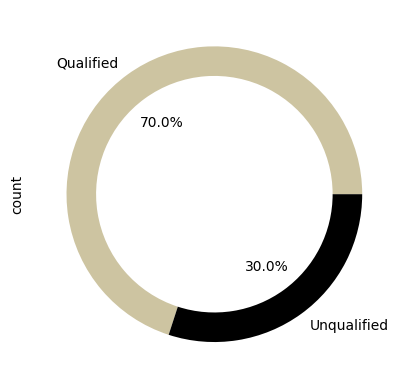

In [68]:
df.Creditability.value_counts().plot(kind='pie' ,autopct="%1.1f%%",colors=['#CDC4A1','black'],explode=(0,0),wedgeprops=dict(width=0.2))
#TODO balance to target column

In [69]:
column_numerical=df.drop(['Payment_Status_of_Previous_Credit'],axis=1).select_dtypes('number').columns
column_numerical

Index(['Duration_of_Credit_monthly', 'Credit_Amount',
       'Duration_in_Current_address', 'Age_years'],
      dtype='object')

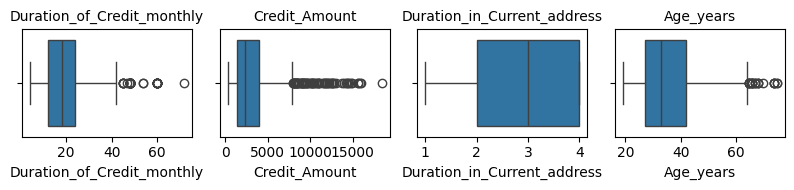

In [70]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(column_numerical)
rows = math.ceil(len(column_numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(column_numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()


In [71]:
categorical_col

Index(['Creditability', 'Account_Balance', 'Payment_Status_of_Previous_Credit',
       'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Most_valuable_available_asset', 'Concurrent_Credits',
       'Type_of_apartment', 'Occupation', 'Telephone', 'Foreign_Worker'],
      dtype='object')

<Axes: xlabel='Purpose'>

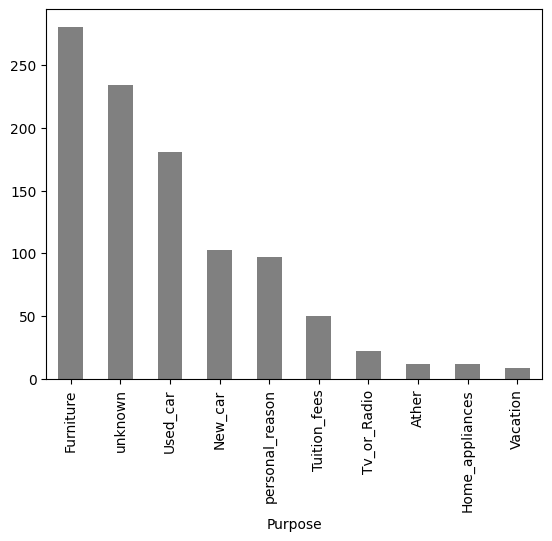

In [72]:
df['Purpose'].value_counts().plot(kind='bar',color='gray')


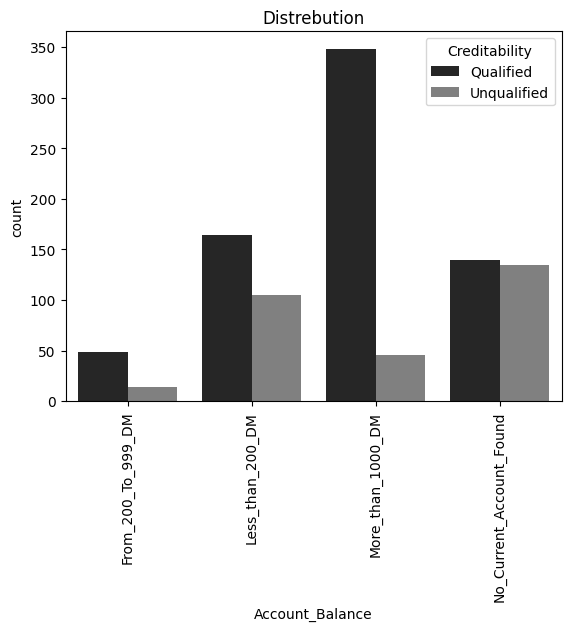

In [73]:
sns.countplot(data=df,x='Account_Balance',hue='Creditability',color='gray')
plt.xticks(rotation=90)
plt.title('Distrebution')
plt.grid(False)
plt.show()

<Axes: xlabel='Age_years'>

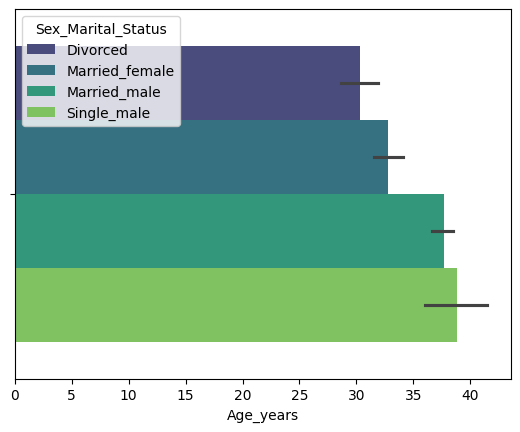

In [74]:
sns.barplot(data=df,hue='Sex_Marital_Status',x='Age_years',palette='viridis')

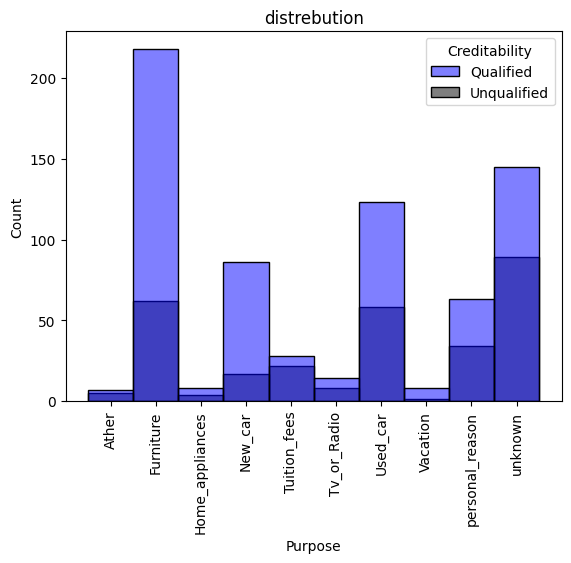

In [75]:
sns.histplot(data=df,x='Purpose',hue='Creditability',palette=['blue','black'])
plt.xticks(rotation=90)
plt.title('distrebution')
plt.show()

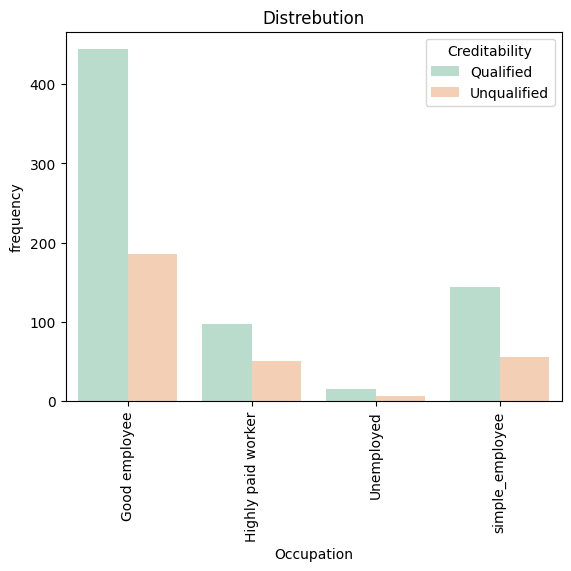

In [76]:
sns.countplot(data=df,hue='Creditability',x='Occupation',palette='Pastel2')
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title('Distrebution')
plt.show()

In [77]:
pd.DataFrame({'nunique':df.nunique(),'types':df.dtypes}).T

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,Occupation,Telephone,Foreign_Worker
nunique,2,4,33,5,10,923,5,5,4,4,3,4,4,53,3,3,4,2,2
types,category,category,int64,category,category,int64,category,category,category,category,category,int64,category,int64,category,category,category,category,category


In [78]:
categorical_col=categorical_col.drop('Creditability')

In [79]:
from sklearn.preprocessing import OneHotEncoder
import joblib

encoder=OneHotEncoder(sparse_output=False)
encoded_array=encoder.fit_transform(df[categorical_col])
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(categorical_col))
df=df.drop(columns=categorical_col)
df=pd.concat([df,encoded_df],axis=1)

df.head()

,Creditability,Duration_of_Credit_monthly,Credit_Amount,Duration_in_Current_address,Age_years,Account_Balance_From_200_To_999_DM,Account_Balance_Less_than_200_DM,Account_Balance_More_than_1000_DM,Account_Balance_No_Current_Account_Found,Payment_Status_of_Previous_Credit_Critical / Default,...,Type_of_apartment_Private_ownership,Type_of_apartment_Rent,Occupation_Good employee,Occupation_Highly paid worker,Occupation_Unemployed,Occupation_simple_employee,Telephone_NO,Telephone_Yes,Foreign_Worker_No,Foreign_Worker_Yes
0,Qualified,18,1049,4,21,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Qualified,9,2799,2,36,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Qualified,12,841,4,23,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,Qualified,12,2122,2,39,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,Qualified,12,2171,4,38,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [80]:
joblib.dump(encoder,'encoder.joblib')

['encoder.joblib']

Building Model
 

In [81]:
numerical=['Duration_of_Credit_monthly', 'Credit_Amount',
       'Duration_in_Current_address', 'Age_years']

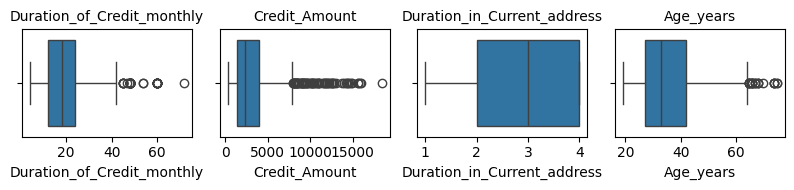

In [82]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(numerical)
rows = math.ceil(len(numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [83]:
#handle Outliers
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numerical:
    for i in range(len(df[col])):  
        if df[col][i] < lower_bound[col]:  
            df.at[i, col] = lower_bound[col]  
        elif df[col][i] > upper_bound[col]:  
            df.at[i, col] = upper_bound[col]
            

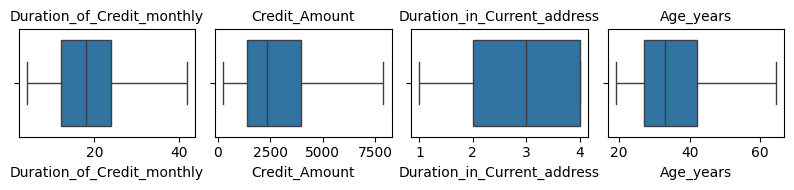

In [84]:
#check Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = len(numerical)
rows = math.ceil(len(numerical) / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [85]:
df.head()

,Creditability,Duration_of_Credit_monthly,Credit_Amount,Duration_in_Current_address,Age_years,Account_Balance_From_200_To_999_DM,Account_Balance_Less_than_200_DM,Account_Balance_More_than_1000_DM,Account_Balance_No_Current_Account_Found,Payment_Status_of_Previous_Credit_Critical / Default,...,Type_of_apartment_Private_ownership,Type_of_apartment_Rent,Occupation_Good employee,Occupation_Highly paid worker,Occupation_Unemployed,Occupation_simple_employee,Telephone_NO,Telephone_Yes,Foreign_Worker_No,Foreign_Worker_Yes
0,Qualified,18,1049.0,4,21.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Qualified,9,2799.0,2,36.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Qualified,12,841.0,4,23.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,Qualified,12,2122.0,2,39.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,Qualified,12,2171.0,4,38.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [86]:
x=df.drop('Creditability',axis=1)
y=df['Creditability']

In [87]:
y.replace({'Qualified':1,'Unqualified':0},inplace=True)

In [88]:
df['Creditability'].value_counts()
#TODO make classes blanced

Creditability
1    700
0    300
Name: count, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.21743962, -0.9158425 ,  1.04698668, ...,  0.82331789,
        -0.19601428,  0.19601428],
       [-1.0657086 , -0.11531726, -0.76597727, ...,  0.82331789,
        -0.19601428,  0.19601428],
       [-0.78295227, -1.01099064,  1.04698668, ...,  0.82331789,
        -0.19601428,  0.19601428],
       ...,
       [ 0.06531671,  2.21003701,  1.04698668, ..., -1.21459768,
        -0.19601428,  0.19601428],
       [-0.78295227,  1.56304108, -1.67245924, ..., -1.21459768,
        -0.19601428,  0.19601428],
       [ 0.91358569,  1.5090628 ,  1.04698668, ...,  0.82331789,
        -0.19601428,  0.19601428]])

In [90]:
pd.DataFrame({'type':df.dtypes}).T


,Creditability,Duration_of_Credit_monthly,Credit_Amount,Duration_in_Current_address,Age_years,Account_Balance_From_200_To_999_DM,Account_Balance_Less_than_200_DM,Account_Balance_More_than_1000_DM,Account_Balance_No_Current_Account_Found,Payment_Status_of_Previous_Credit_Critical / Default,...,Type_of_apartment_Private_ownership,Type_of_apartment_Rent,Occupation_Good employee,Occupation_Highly paid worker,Occupation_Unemployed,Occupation_simple_employee,Telephone_NO,Telephone_Yes,Foreign_Worker_No,Foreign_Worker_Yes
type,category,int64,float64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [91]:
df['Creditability']=df['Creditability'].astype('int')

In [92]:
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [94]:
y_train = y_train.to_numpy(dtype="int")
y_test = y_test.to_numpy(dtype="int")

In [95]:
model = Sequential([
    Dense(64, input_shape=(x.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [96]:
early_stopping=EarlyStopping(patience=7,monitor='val_loss',restore_best_weights=True)

In [97]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/150
29/29 [==============================] - 2s 11ms/step - loss: 0.9254 - accuracy: 0.3122 - val_loss: 0.7908 - val_accuracy: 0.2800
Epoch 2/150
29/29 [==============================] - 0s 4ms/step - loss: 0.8848 - accuracy: 0.3144 - val_loss: 0.7602 - val_accuracy: 0.2800
Epoch 3/150
29/29 [==============================] - 0s 4ms/step - loss: 0.8481 - accuracy: 0.3211 - val_loss: 0.7393 - val_accuracy: 0.2900
Epoch 4/150
29/29 [==============================] - 0s 4ms/step - loss: 0.8133 - accuracy: 0.3444 - val_loss: 0.7237 - val_accuracy: 0.3100
Epoch 5/150
29/29 [==============================] - 0s 4ms/step - loss: 0.7880 - accuracy: 0.3511 - val_loss: 0.7133 - val_accuracy: 0.3800
Epoch 6/150
29/29 [==============================] - 0s 4ms/step - loss: 0.7714 - accuracy: 0.3533 - val_loss: 0.7045 - val_accuracy: 0.4200
Epoch 7/150
29/29 [==============================] - 0s 4ms/step - loss: 0.7644 - accuracy: 0.3622 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 8/150


In [98]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5263 - accuracy: 0.7400


[0.5262678861618042, 0.7400000095367432]

In [99]:
model.evaluate(x_train, y_train)

29/29 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7422


[0.4587826132774353, 0.742222249507904]

In [100]:
model.save("my_bank_model.h5")